# <center>Metody Numeryczne</center>

# Laboratorium 8: Rozwiązywanie równań nieliniowych


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest poznanie numerycznych metod rozwiązywania układów równań nieliniowych. W ramach laboratorium przedstawione zostaną metody: [*bisekcji*](https://www.wikiwand.com/pl/articles/Metoda_r%C3%B3wnego_podzia%C5%82u), [*siecznych*](https://www.wikiwand.com/pl/articles/Metoda_siecznych) oraz [*Newtona*](https://www.wikiwand.com/pl/articles/Metoda_Newtona).

Tematem wiodącym podczas tych zajęć będzie poszukiwanie miejsc zerowych funkcji zdefiniowanej w następujący sposób: 
$$ 
f(x) = e^{-2x} + x^2 - 1 
$$

Funkcja $f(x)$ oraz jej pierwsza i druga pochodna ($f'(x)$, $f''(x)$) zostały zaimplementowane w pliku `main.py`, odpowiednio jako `func()`, `dfunc()` i `ddfunc()`.

### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [1]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt

---

### **Zadanie 1.**

1. Zaprezentuj na jednym wykresie przebieg funkcji $f(x)$, $f'(x)$ oraz $f''(x)$, w taki sposób, aby na podstawie rysunku można było zgrubnie określić położenie miejsc zerowych funkcji.

2. Na podstawie analizy wykresu określ przedziały, w których znajdują się miejsca zerowe funkcji $f(x)$.

3. Odpowiedz w jaki sposób (wykorzystując pierwszą i drugą pochodną) można znaleźć miejsca zerowe funkcji.


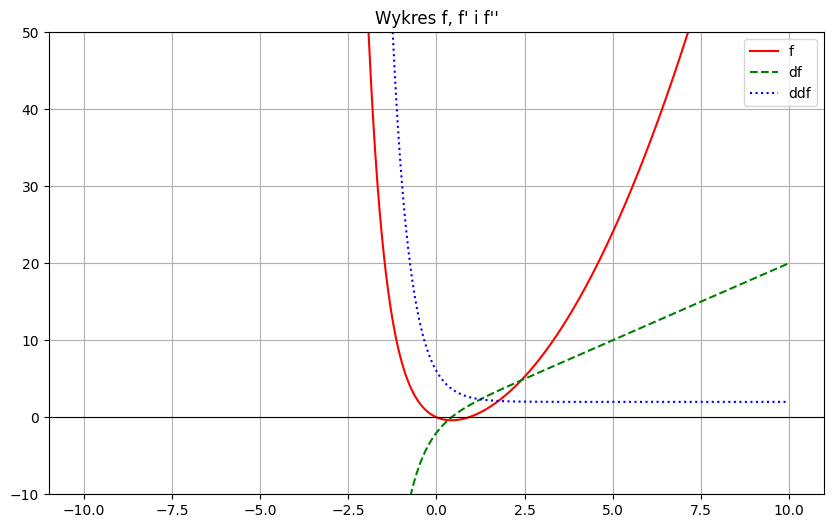

In [26]:
import matplotlib.pyplot as plt
from main import func, dfunc, ddfunc
import numpy as np
x=np.linspace(-10,10,2000)
y=func(x)
dy=dfunc(x)
ddy=ddfunc(x)
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'r-', label='f')       
plt.plot(x, dy, 'g--', label='df')   
plt.plot(x, ddy, 'b:', label='ddf') 

plt.axhline(0, color='black', linewidth=0.8)
plt.grid(True)
plt.legend()
plt.title("Wykres f, f' i f''")
plt.ylim(-10, 50)
plt.show()

2.<br>
Przedziały w których znajdują się miejsca zerowe:<-0.5;0.5>, <0.5;1><br>
3.<br>
Za pomocą pochodnych wyznaczamy punkty krytyczne i punkty przegięcia, dzielimy oś na przedziały zgodnie z wyznaczonymi punktami i sprawdzamy znak funkcji na końcach przedziałów. Znak się zmienia - jest conajmniej jedno miejsce zerowe w przedziale.



---

### **Zadanie 2.**

Najprostszą metodą do wyznaczenia miejsc zerowych funkcji nieliniowej jest [metoda bisekcji](https://en.wikipedia.org/wiki/Bisection_method). 

Zaimplementuj funkcję *`bisection()`* pamiętając, że gwarancją zbieżności metody bisekcji dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

---

### **Zadanie 3.**

Bardziej zaawansowaną metodą wyznaczania miejsc zerowych jest [metoda siecznych](https://en.wikipedia.org/wiki/Secant_method), która stanowi rozwinięcie [metody Regula Falsi](https://en.wikipedia.org/wiki/Regula_falsi).

Zaimplementuj funkcję *`secant()`* pamiętając, że gwarancją zbieżności metody siecznych dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

3. Pierwsza i druga pochodna funkcji $f(x)$ są ciągłe w przedziale domkniętym $[a,b]$.

4. Pierwsza i druga pochodna funkcji $f(x)$ w przedziale domkniętym $[a, b]$ mają stały znak i są różne od zera.


---

### **Zadanie 4.**

Inną metodą, wykorzystywaną do poszukiwania miejsc zerowych funkcji, jest [metoda Newtona](https://en.wikipedia.org/wiki/Newton%27s_method), nazywana również metodą stycznych.

**Podpunkt 1.**

Algorytm metody Newtona wykorzystuje wartości pierwszej pochodnej, dlatego przed przystąpieniem do jej implementacji przygotuj pomocniczą funkcję *`difference_quotient()`*, służącą do wyznaczenia wartości ilorazu różnicowego.

<br>

**Podpunkt 2.**

Zaimplementuj funkcję *`newton()`* pamiętając, że gwarancją zbieżności metody Newtona dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

3. Pierwsza i druga pochodna funkcji $f(x)$ są ciągłe w przedziale domkniętym $[a,b]$.

4. Pierwsza i druga pochodna funkcji $f(x)$ w przedziale domkniętym $[a, b]$ mają stały znak i są różne od zera.

---

### **Zadanie 5.**

Dla funkcji $f(x)$ zdefiniowanej w sekcji **Cel zajęć** znajdź miejsca zerowe przy użyciu:

- funkcji [`sp.optimize.root()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html).
- funkcji [`sp.optimize.fsolve()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html).

In [3]:
# ===== Twoja implementacja tutaj =====
import numpy as np
import scipy as sp
from main import func
import matplotlib.pyplot as plt
from scipy.optimize import root, fsolve
#roots
xs = np.linspace(-10, 10, 100) 
roots = []

for x0 in xs:
    try:
        sol = root(func, x0)
        if sol.success:
            roots.append(np.round(sol.x[0], 10))
    except:
        pass

roots = np.unique(roots)
print("Pierwiastki (root):")
print(roots)
#fsolve
xs = np.linspace(-10, 10, 100)  
roots_f = []

for x0 in xs:
    try:
        sol = fsolve(func, x0)[0]
        roots_f.append(np.round(sol, 10))
    except:
        pass

roots_f = np.unique(roots_f)
print("Pierwiastki (fsolve):")
print(roots_f)

Pierwiastki (root):
[-0.          0.91656258]
Pierwiastki (fsolve):
[-0.          0.91656258]


---

### **Zadanie 6.**

Korzystając z przedziałów wyznaczonych w **Zadaniu 1.** znajdź miejsca zerowe funkcji $f(x)$ zdefiniowanej w sekcji **Cel zajęć**, przy użyciu:

- metody bisekcji,
- metody siecznych,
- metody Newtona,

z tolerancją równą $1\mathrm{e}{-10}$.

Zbadaj dokładność (względem rozwiązania z **Zadania 5.**) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 

In [ ]:
# ===== Twoja implementacja tutaj =====
from main import bisection, secant, newton



---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)